# New Delhi Rental Price Prediction
### Business Problem: The dataset is from a rental price prediction that contains 17890 rental listings from a popular real estate website. Includes different types of properties (Apartments, Independent floors, Independent houses, Villas etc.). The goal is to predict price of rent in New Delhi houses. 


#### Content
The dataset multiple quantitative, categorical and co-ordinate features including :

1. __Data about the houses :__
sizesqft,
propertyType,
bedrooms,

2. __Data about the locality of the house :__
latitude,
longitude,
localityName,
suburbName,
cityName,

3. __Asking Rent :__
price,

4. __Property agency :__
companyName,

5. __Distance to closest landmarks : (geodesic distance, not driving-road distance)__
closestmterostationkm, APdistkm, Aiimsdistkm, NDRLWdist_kmContext


* __Data Source__ : https://www.kaggle.com/andynath/new-delhi-rental-listings

## Import neccesary libraries

In [1]:
# Importing necessary packages for predictions

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for plots to apppear inside the notebook
%matplotlib inline 

# Stats
from scipy import stats
from scipy.stats import norm

# data preprocessing techniques 
from sklearn import preprocessing  

# Models
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


# Model Evaluations 
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

## Load the dataset

In [2]:
df = pd.read_csv("Data/New Delhi Rental List.csv")
print("Shape of dataset",df.shape)

Shape of dataset (17890, 15)


In [3]:
df.head()

,Unnamed: 0,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271


In [4]:
# dropping "Unnamed: 0" variable beacuse it's not necessary
df.drop("Unnamed: 0",axis=1,inplace=True)

## EDA
__The Goal is__
* Each row in the dataset describes the characteristics of a house rent.
* Our goal is to predict the Price, given these features.

In [5]:
# Checking for count of duplicate entries
df.duplicated().sum() 

0

> There is no duplicate values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17890 entries, 0 to 17889
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   size_sq_ft                17890 non-null  int64  
 1   propertyType              17890 non-null  object 
 2   bedrooms                  17890 non-null  int64  
 3   latitude                  17890 non-null  float64
 4   longitude                 17890 non-null  float64
 5   localityName              17890 non-null  object 
 6   suburbName                17890 non-null  object 
 7   cityName                  17890 non-null  object 
 8   price                     17890 non-null  int64  
 9   companyName               17890 non-null  object 
 10  closest_mtero_station_km  17890 non-null  float64
 11  AP_dist_km                17890 non-null  float64
 12  Aiims_dist_km             17890 non-null  float64
 13  NDRLW_dist_km             17890 non-null  float64
dtypes: flo

In [7]:
# Is there any missing values?
# let's check
df.isnull().sum()

size_sq_ft                  0
propertyType                0
bedrooms                    0
latitude                    0
longitude                   0
localityName                0
suburbName                  0
cityName                    0
price                       0
companyName                 0
closest_mtero_station_km    0
AP_dist_km                  0
Aiims_dist_km               0
NDRLW_dist_km               0
dtype: int64

> Great!!! there is not a single missing / NA values

In [8]:
df.describe(include=['O']) # statastical summary of categorical variables

,propertyType,localityName,suburbName,cityName,companyName
count,17890,17890,17890,17890,17890
unique,4,781,12,1,1387
top,Independent Floor,Patel Nagar,Delhi South,Delhi,Gurmeet
freq,11218,1448,3749,17890,668


In [9]:
df.describe() # statastical summary of numerical variables 

,size_sq_ft,bedrooms,latitude,longitude,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
count,17890.000000,17890.000000,17890.000000,17890.000000,1.789000e+04,17890.000000,17890.000000,17890.000000,17890.000000
mean,1176.342091,2.168865,28.609382,77.168368,3.345196e+04,0.931495,13.727784,11.238134,11.421994
std,873.751044,0.971414,0.099547,0.097611,8.802054e+04,8.287856,11.357063,11.167202,11.063323
min,100.000000,1.000000,19.185120,73.213829,1.200000e+03,0.000692,1.784779,0.634508,0.722023
25%,620.000000,1.000000,28.562540,77.103718,1.350000e+04,0.457782,11.018715,7.769267,7.986813
50%,900.000000,2.000000,28.611803,77.168755,2.200000e+04,0.698560,13.184035,10.515524,11.015571
75%,1600.000000,3.000000,28.651593,77.224998,3.500000e+04,1.087740,17.163502,15.514042,15.192483
max,16521.000000,15.000000,28.872597,80.358467,5.885646e+06,1096.479453,1109.894053,1115.621439,1123.778457


### Let's  analyze the df variable (price)
Let's check out the most interesting feature in this study: Price.

__Important Note:__ This data is from New Delhi. The location is extremely correlated with Rent Price. (We had to take a double-take at a point, since we are considering ourself a house-browsing enthusiast)

In [10]:
# Getting Description
df['price'].describe()

count    1.789000e+04
mean     3.345196e+04
std      8.802054e+04
min      1.200000e+03
25%      1.350000e+04
50%      2.200000e+04
75%      3.500000e+04
max      5.885646e+06
Name: price, dtype: float64

> With an average rent price of 33450 INR, should people will rent or not? (P.S. : Just asking casually).

Also, In New Delhi its showing the minimum rent price is 1200 INR that is not possible.
So, let's remove it

In [11]:
median = df.loc[df['price'] > 3000, 'price'].median()
df["price"] = df["price"].mask(df["price"] < 3000, median)

In [12]:
df.price.describe()

count    1.789000e+04
mean     3.345312e+04
std      8.802026e+04
min      3.000000e+03
25%      1.350000e+04
50%      2.200000e+04
75%      3.500000e+04
max      5.885646e+06
Name: price, dtype: float64


 mu = 33453.12 and sigma = 88017.80



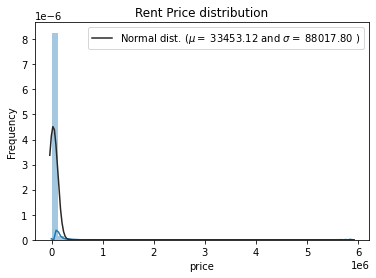

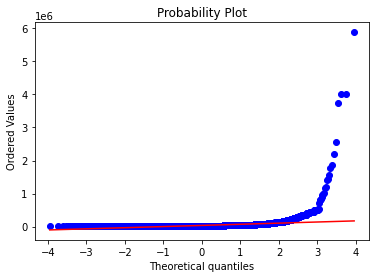

Skewness: 35.859988
Kurtosis: 1830.270191


In [13]:
# Plot Histogram for 'price'
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rent Price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

> The "price" is highly skewed to the right (i.e. Highly positive skewed). This is a problem because most ML models don't do well with non-normally distributed data.
However, looking at the skewness score, we can see that the rent prices highly deviate from the normal distribution. Going to have to fix this later! We want our data to be as "normal" as possible.

### Now let's do some multivariable analysis

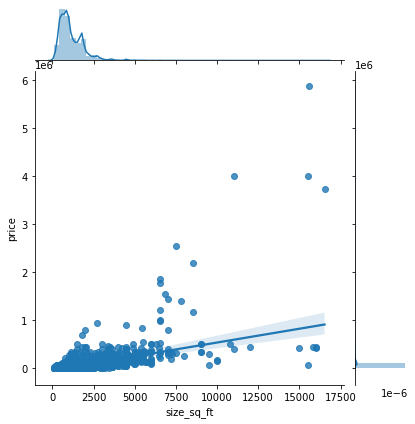

In [14]:
# let's visualize, size_sq_ft vs price
sns.jointplot(x=df['size_sq_ft'], y=df['price'], kind='reg')

In [15]:
df.propertyType.value_counts()

Independent Floor    11218
Apartment             5725
Independent House      896
Villa                   51
Name: propertyType, dtype: int64

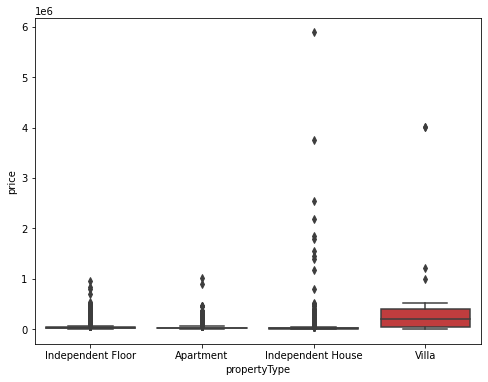

In [16]:
# propertyType vs price
var = 'propertyType'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)

> People pay more for better quality right? Nothing new here. Let's move on.

In [17]:
df.bedrooms.value_counts()

2     5902
3     5532
1     5214
4     1127
5       79
6       17
10      10
7        3
9        2
8        2
15       1
12       1
Name: bedrooms, dtype: int64

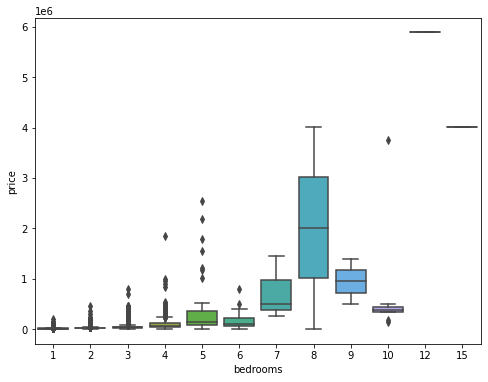

In [18]:
# bedrooms vs price
var = 'bedrooms'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)

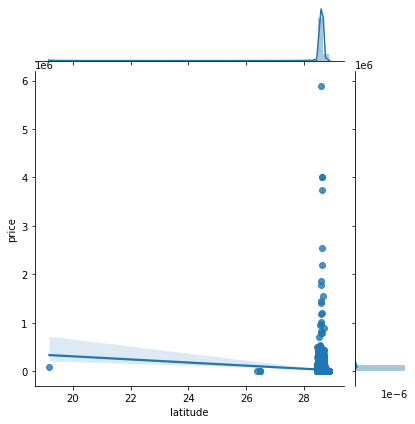

In [19]:
# latitude vs price
sns.jointplot(x=df['latitude'], y=df['price'], kind='reg')

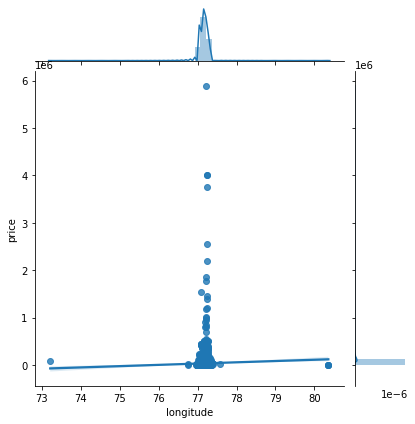

In [20]:
# longitude vs price
sns.jointplot(x=df['longitude'], y=df['price'], kind='reg')

In [21]:
df.suburbName.value_counts()

Delhi South         3749
Delhi Central       2732
Other               2706
Dwarka              2435
West Delhi          2222
Delhi East          1933
North Delhi         1252
Delhi West           314
Rohini               274
Delhi North          176
South West Delhi      86
North West Delhi      11
Name: suburbName, dtype: int64

> From the observation of above categorical features we can see that in "suburbName" attribute there are two Delhi West("West Delhi" & "Delhi West ") and two Delhi North("North Delhi" & "Delhi North") 

Let's fixed this attribute

In [22]:
# fixing "suburbName" attribute
df.loc[(df.suburbName == "Delhi West"), "suburbName"] = "West Delhi"
df.loc[(df.suburbName == "Delhi North"), "suburbName"] = "North Delhi"

In [23]:
df.suburbName.value_counts()

Delhi South         3749
Delhi Central       2732
Other               2706
West Delhi          2536
Dwarka              2435
Delhi East          1933
North Delhi         1428
Rohini               274
South West Delhi      86
North West Delhi      11
Name: suburbName, dtype: int64

In [24]:
# lets's arreange "Delhi South","Delhi Central" and "Delhi East" in proper manner
df.loc[(df.suburbName == "Delhi South"), "suburbName"] = "South Delhi"
df.loc[(df.suburbName == "Delhi Central"), "suburbName"] = "Central Delhi"
df.loc[(df.suburbName == "Delhi East"), "suburbName"] = "East Delhi"

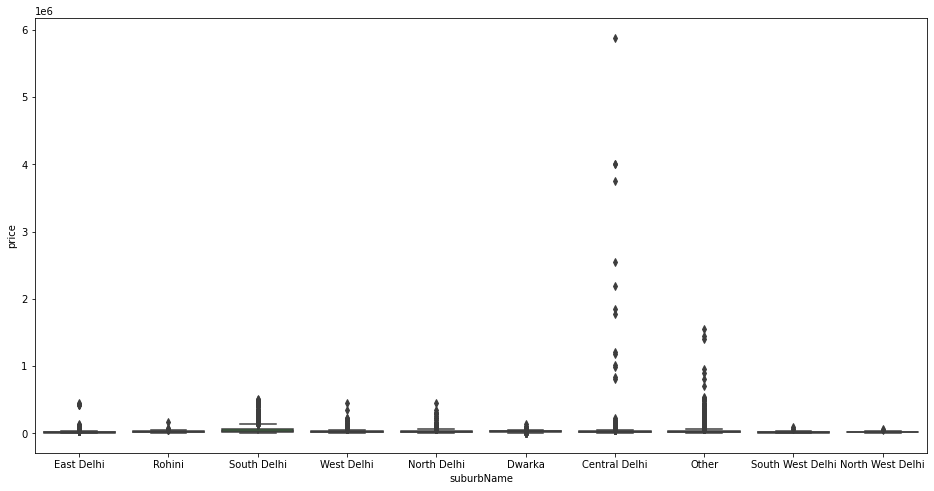

In [25]:
# suburbName vs price
var = 'suburbName'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)

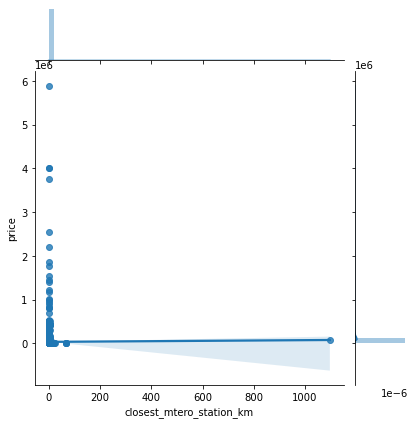

In [26]:
# closest_mtero_station_km vs price
sns.jointplot(x=df['closest_mtero_station_km'], y=df['price'], kind='reg')

> What the heck,in closest metro station distance its showing 1000km its an oulier so let's remove it.

In [27]:
# Removing outliers manually (Two points in the bottom right)
df = df.drop(df[(df['closest_mtero_station_km']>20) 
                         & (df['price']<6000000)].index).reset_index(drop=True)

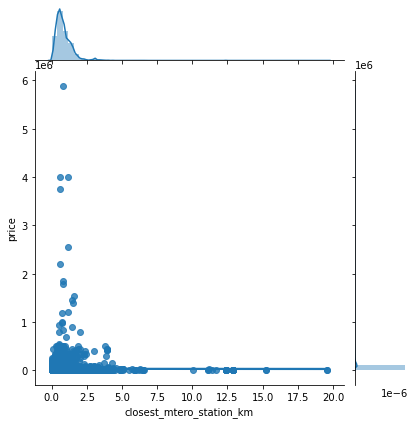

In [28]:
# closest_mtero_station_km vs price
sns.jointplot(x=df['closest_mtero_station_km'], y=df['price'], kind='reg')

> Now, its looking good

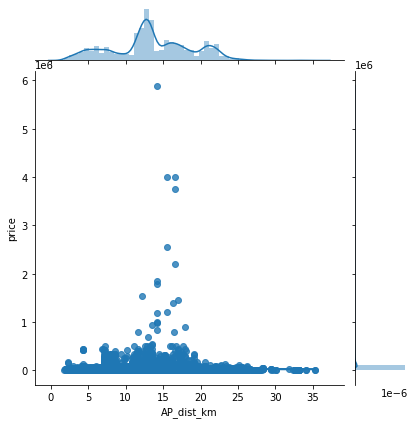

In [29]:
# AP_dist_km vs price
sns.jointplot(x=df['AP_dist_km'], y=df['price'], kind='reg')

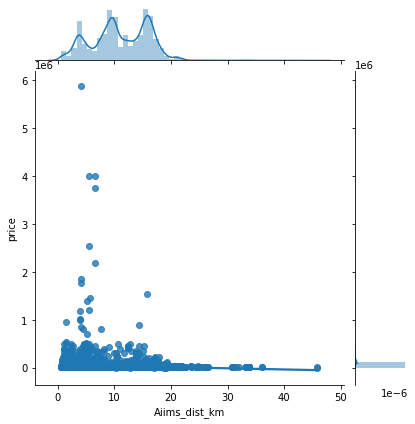

In [30]:
# Aiims_dist_km vs price
sns.jointplot(x=df['Aiims_dist_km'], y=df['price'], kind='reg')

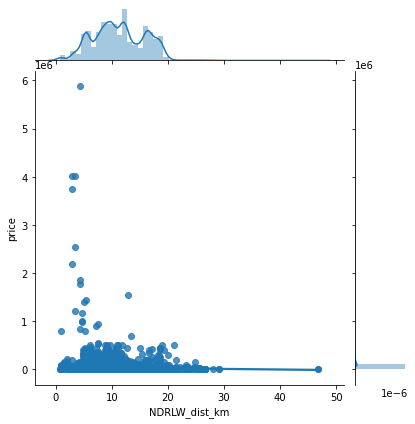

In [31]:
# NDRLW_dist_km vs price
sns.jointplot(x=df['NDRLW_dist_km'], y=df['price'], kind='reg')

In [32]:
# Make correlation matrix
df.corr()

,size_sq_ft,bedrooms,latitude,longitude,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
size_sq_ft,1.000000,0.755710,-0.124982,-0.106721,0.570737,0.038678,-0.191023,-0.080166,0.128983
bedrooms,0.755710,1.000000,-0.037968,-0.190271,0.379979,0.057925,-0.190698,0.079480,0.207369
latitude,-0.124982,-0.037968,1.000000,-0.213479,-0.055036,-0.046222,0.338656,0.661174,-0.362158
longitude,-0.106721,-0.190271,-0.213479,1.000000,0.040718,-0.124961,0.777978,-0.637095,-0.592260
price,0.570737,0.379979,-0.055036,0.040718,1.000000,-0.001291,-0.021399,-0.138539,-0.061816
closest_mtero_station_km,0.038678,0.057925,-0.046222,-0.124961,-0.001291,1.000000,0.026595,0.202740,0.372411
AP_dist_km,-0.191023,-0.190698,0.338656,0.777978,-0.021399,0.026595,1.000000,-0.088707,-0.540549
Aiims_dist_km,-0.080166,0.079480,0.661174,-0.637095,-0.138539,0.202740,-0.088707,1.000000,0.395036
NDRLW_dist_km,0.128983,0.207369,-0.362158,-0.592260,-0.061816,0.372411,-0.540549,0.395036,1.000000


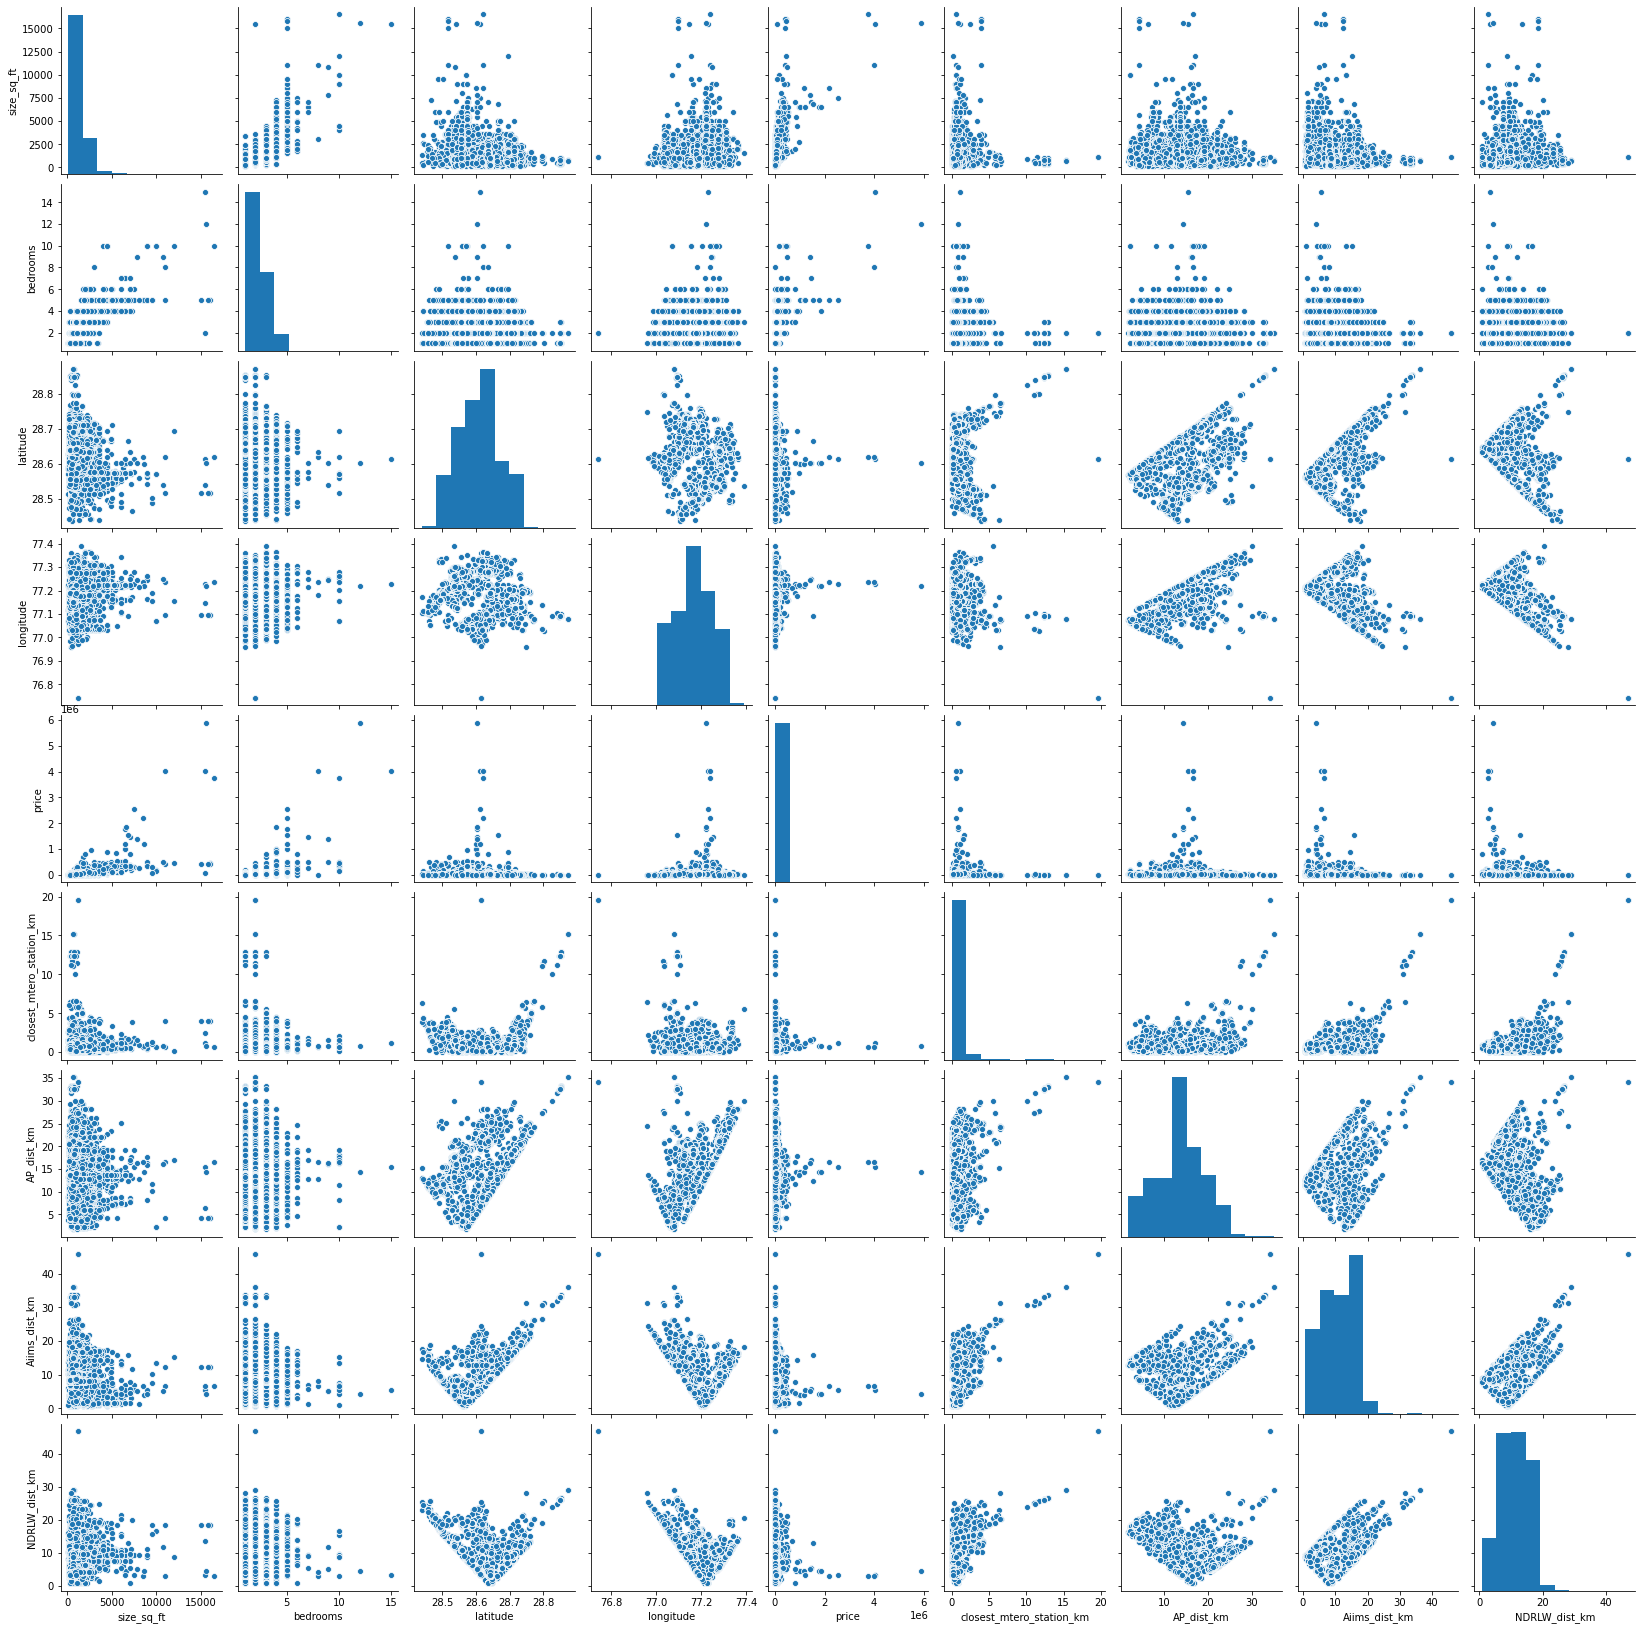

In [33]:
# let's plot pairplot for dataset
sns.pairplot(df)

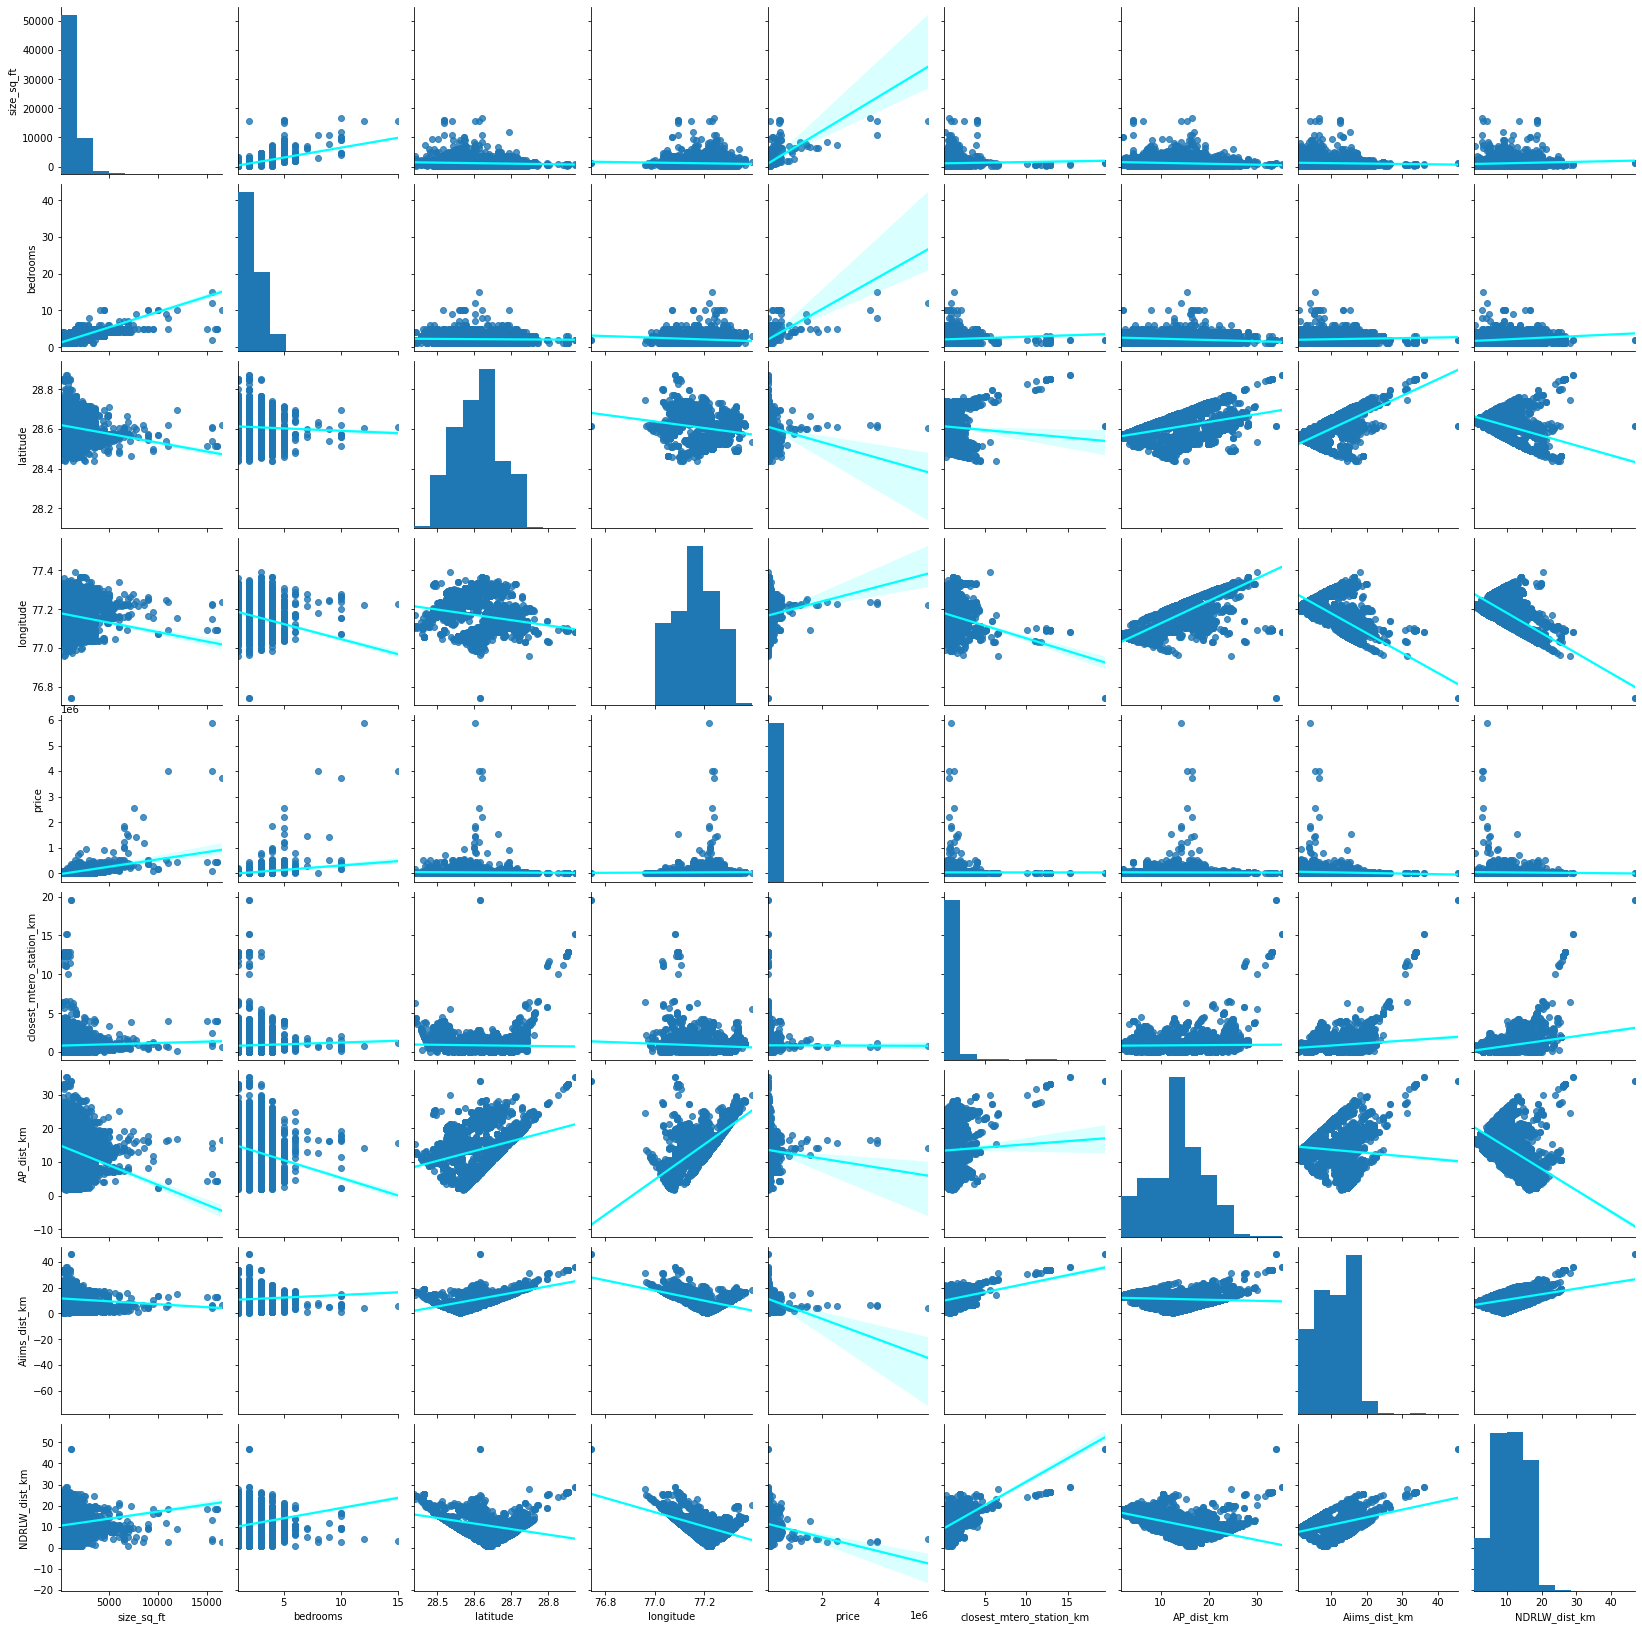

Wall time: 1min 10s


In [34]:
%%time

sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

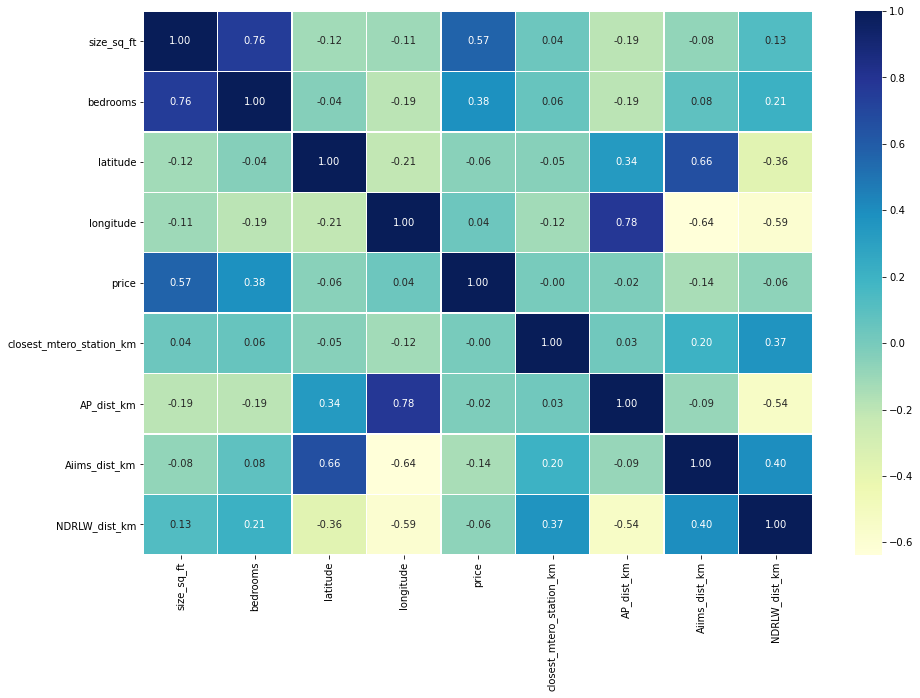

In [35]:
# Let's visualize our corrrelation matrix for better understanding
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

## Feature Transformation / Engineering
#### Fixing "skewed" features.
Here, we fix all of the skewed data to be more normal so that our models will be more accurate when making predictions.


 mu = 10.03 and sigma = 0.74



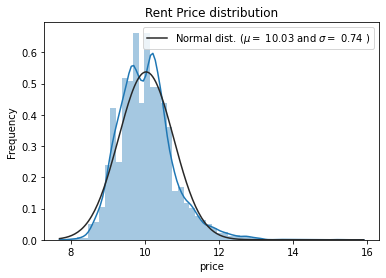

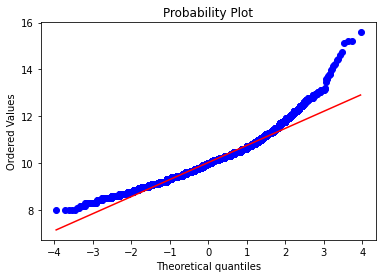

Skewness: 0.891982
Kurtosis: 2.168104


In [36]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["price"] = np.log1p(df["price"])

#Check the new distribution 
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rent Price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

y_df = df.price.values

print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

In [37]:
df.head()

,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,East Delhi,Delhi,9.105091,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,East Delhi,Delhi,9.903538,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,East Delhi,Delhi,10.239996,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,East Delhi,Delhi,10.239996,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,East Delhi,Delhi,9.433564,Shree Properties,1.087760,22.592810,10.571573,10.263271


In [38]:
# Now let's drop this variables because there is no impact on dependent variable
df.drop(["localityName","cityName","companyName"],axis = 1,inplace = True)
print("Shape of final dataset : ", df.shape)
df.head()

Shape of final dataset :  (17884, 11)


,size_sq_ft,propertyType,bedrooms,latitude,longitude,suburbName,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,400,Independent Floor,1,28.641010,77.284386,East Delhi,9.105091,0.577495,21.741188,11.119239,6.227231
1,1050,Apartment,2,28.594969,77.298668,East Delhi,9.903538,0.417142,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,28.641806,77.293922,East Delhi,10.239996,0.125136,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,28.644363,77.293228,East Delhi,10.239996,0.371709,22.681201,11.982708,7.097348
4,450,Apartment,2,28.594736,77.311150,East Delhi,9.433564,1.087760,22.592810,10.571573,10.263271


In [39]:
# convert categorical into numericals
category_col =['propertyType','suburbName'] 
labelEncoder = preprocessing.LabelEncoder()

mapping_dict ={} 
for col in category_col: 
    df[col] = labelEncoder.fit_transform(df[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
    
print(mapping_dict)

{'propertyType': {'Apartment': 0, 'Independent Floor': 1, 'Independent House': 2, 'Villa': 3}, 'suburbName': {'Central Delhi': 0, 'Dwarka': 1, 'East Delhi': 2, 'North Delhi': 3, 'North West Delhi': 4, 'Other': 5, 'Rohini': 6, 'South Delhi': 7, 'South West Delhi': 8, 'West Delhi': 9}}


In [40]:
# let's make independent and dependent features

X = df.drop("price",axis=1)
y = df.price

### Feature Importance

In [41]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [42]:
print(model.feature_importances_)

[0.3975175  0.02162912 0.28562986 0.03933419 0.0441023  0.02209656
 0.02055625 0.03383475 0.08663253 0.04866695]


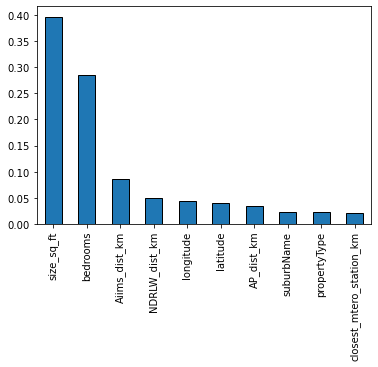

In [43]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar',ec='black')
plt.show()

In [44]:
# Now split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## Model Building & Evaluation

In [45]:
# 1. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

print(rf.fit(X_train,y_train))
print("="*100)

# Make predictions
pred_test = rf.predict(X_test)
pred_train = rf.predict(X_train)

# Check model performance
print('Training data r-squared:', rf.score(X_train, y_train))
print('Test data r-squared:', rf.score(X_test, y_test))
print("="*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=1200, oob_score=True,
                      random_state=42)
Training data r-squared: 0.9200841504596059
Test data r-squared: 0.8511897002207606
MAE: 0.18703712947480652
MSE: 0.07822727547536214
RMSE: 0.2796913932808125


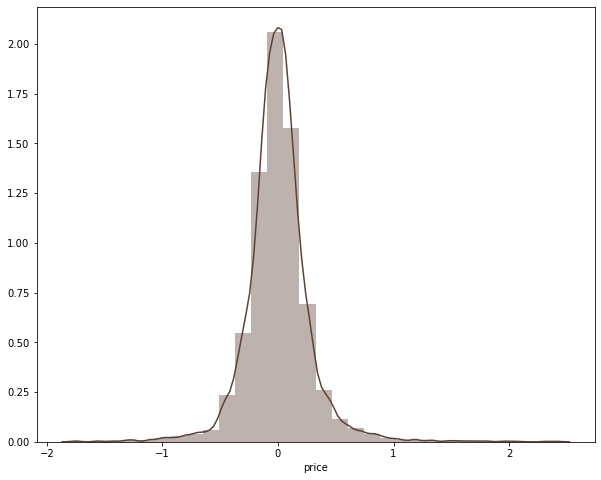

In [46]:
plt.figure(figsize=(10, 8))
sns.distplot(y_test-pred_test, bins=30, hist=True, color='#5D4037')
plt.show()

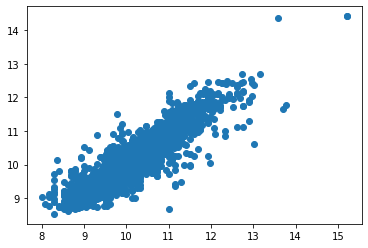

In [47]:
plt.scatter(y_test,pred_test)

In [48]:
# 2. Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

print(lightgbm.fit(X_train,y_train))
print("="*100)

# Make predictions
pred_test = lightgbm.predict(X_test)
pred_train = lightgbm.predict(X_train)

# Check model performance
print('Training data r-squared:', lightgbm.score(X_train, y_train))
print('Test data r-squared:', lightgbm.score(X_test, y_test))
print("="*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=11, n_estimators=7000,
              num_leaves=6, objective='regression', random_state=42,
              verbose=-1)
Training data r-squared: 0.8790212035488174
Test data r-squared: 0.8551852974193953
MAE: 0.19325564009255033
MSE: 0.07612685176000189
RMSE: 0.27591094896723817


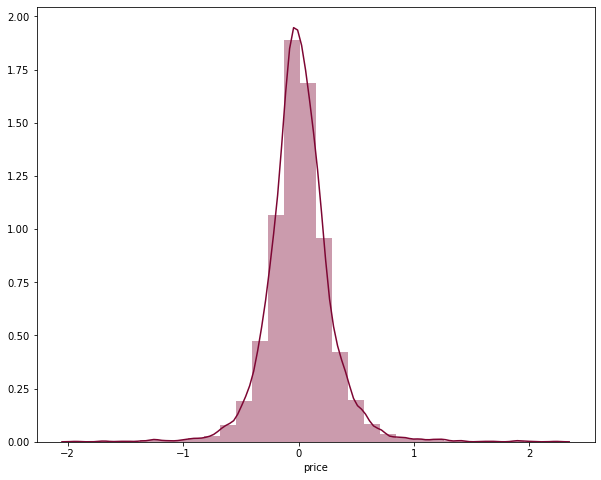

In [49]:
plt.figure(figsize=(10, 8))
sns.distplot(y_test-pred_test, bins=30, hist=True, color='#7d0633')
plt.show()

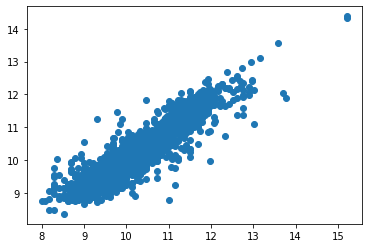

In [50]:
plt.scatter(y_test,pred_test)

In [51]:
# 3. XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

print(xgboost.fit(X_train,y_train))
print("="*100)

# Make predictions
pred_test = xgboost.predict(X_test)
pred_train = xgboost.predict(X_train)

# Check model performance
print('Training data r-squared:', xgboost.score(X_train, y_train))
print('Test data r-squared:', xgboost.score(X_test, y_test))
print("="*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

[13:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=6000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=6e-05,
             reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
Training

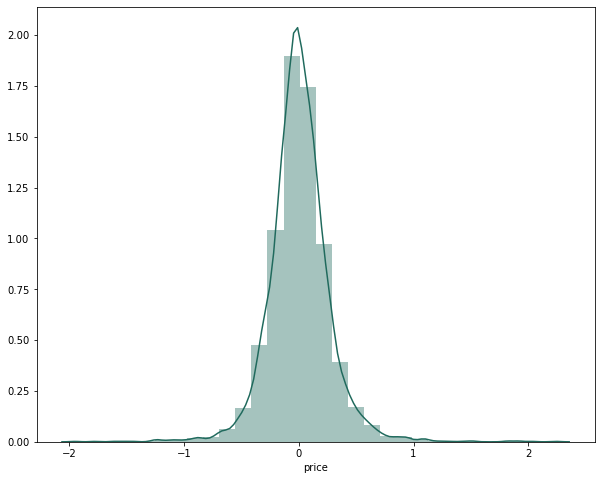

In [52]:
plt.figure(figsize=(10, 8))
sns.distplot(y_test-pred_test, bins=30, hist=True, color='#206a5d')
plt.show()

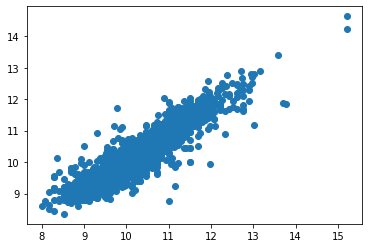

In [53]:
plt.scatter(y_test,pred_test)

In [54]:
# 4. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 

print(gbr.fit(X_train,y_train))
print("="*100)

# Make predictions
pred_test = gbr.predict(X_test)
pred_train = gbr.predict(X_train)

# Check model performance
print('Training data r-squared:', gbr.score(X_train, y_train))
print('Test data r-squared:', gbr.score(X_test, y_test))
print("="*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=6000,
                          random_state=42)
Training data r-squared: 0.9004755151535521
Test data r-squared: 0.8665278362543318
MAE: 0.18131781547783576
MSE: 0.07016425433665899
RMSE: 0.2648853607443397


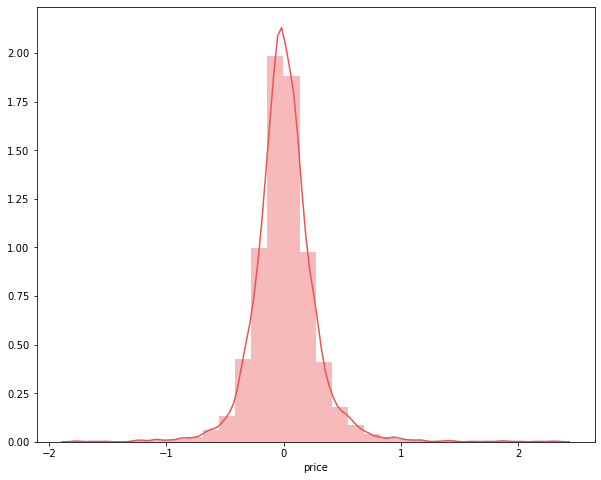

In [55]:
plt.figure(figsize=(10, 8))
sns.distplot(y_test-pred_test, bins=30, hist=True, color='#ea5455')
plt.show()

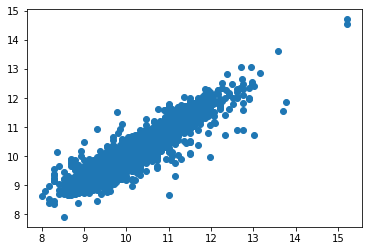

In [56]:
plt.scatter(y_test,pred_test)

## Best model selection

From building the several model "Gradient Boosting Regressor" is giving the best accuracy with RMSE=0.264 , so we conclude that this is our best fit model for model predictions and now we will save this final model for model predictons for deployment.

In [57]:
# Saving model to disk
import pickle
pickle.dump(gbr, open('NewDelhiRentPrice_model.pkl','wb'))

## Now final task let's make predictions

In [58]:
# load the model and make predictions
model = pickle.load(open('NewDelhiRentPrice_model.pkl','rb'))
print(model.predict([[400,1,2,28.64,77.28,3,0.57,21.74,11.11,6.22]])*1000)

# 400	Independent Floor	1	28.641010	77.284386	Delhi East	9000	0.577495	21.741188	11.119239	6.227231

[9404.43281064]
